# Import libraries

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

!pip install xgboost
import xgboost as xgb

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
data = pd.read_csv(r"E:\GFG Datascience\solar irradiance prediction\SolarPrediction.csv")

In [7]:
data.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
data.info

<bound method DataFrame.info of          UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  Wind

Data Wrangling

In [9]:
df = data.copy()

In [10]:
# extract the date from the date_time format of the 'Data' parameter
df['Data'] = df['Data'].apply(lambda x : x.split()[0])

In [11]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [12]:
# extract the sunrise and sunset information using regular expression
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [13]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,risehour,riseminuter,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,6,13,18,13


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  risehour                32686 non-null  int32  
 12  riseminuter             32686 non-null  int32  
 13  sethour                 32686 non-null  int32  
 14  setminute               32686 non-null

In [15]:
# drop the parameters that are not required after extracting the relevant information
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [16]:
# check of data dimensions
df.shape

(32686, 10)

In [17]:
# checking for null values in the data
df.isnull().sum().sum()

0

In [18]:
# glimpse of the final data
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,risehour,riseminuter,sethour,setminute
0,1.21,48,30.46,59,177.39,5.62,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,6,13,18,13


In [19]:
np.array(df['Radiation'])

array([1.21, 1.21, 1.23, ..., 1.2 , 1.23, 1.2 ])

In [20]:
input_features = df.drop('Radiation', axis = 1)
target = df['Radiation']


Feature Selection using Correlation Matrix
 



In [21]:
# extract the correlation between the data features
corr_matrix = df.corr()
corr_matrix

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,risehour,riseminuter,sethour,setminute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,NaN,0.167075,-0.159384,0.119926
risehour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
riseminuter,-0.092850,-0.380968,-0.380399,-0.023955,0.176929,0.167075,NaN,1.000000,-0.742329,0.562851
sethour,0.048719,0.300920,0.151939,0.145143,-0.078540,-0.159384,NaN,-0.742329,1.000000,-0.873471
setminute,-0.039816,-0.242881,-0.119599,-0.119526,0.070030,0.119926,NaN,0.562851,-0.873471,1.000000


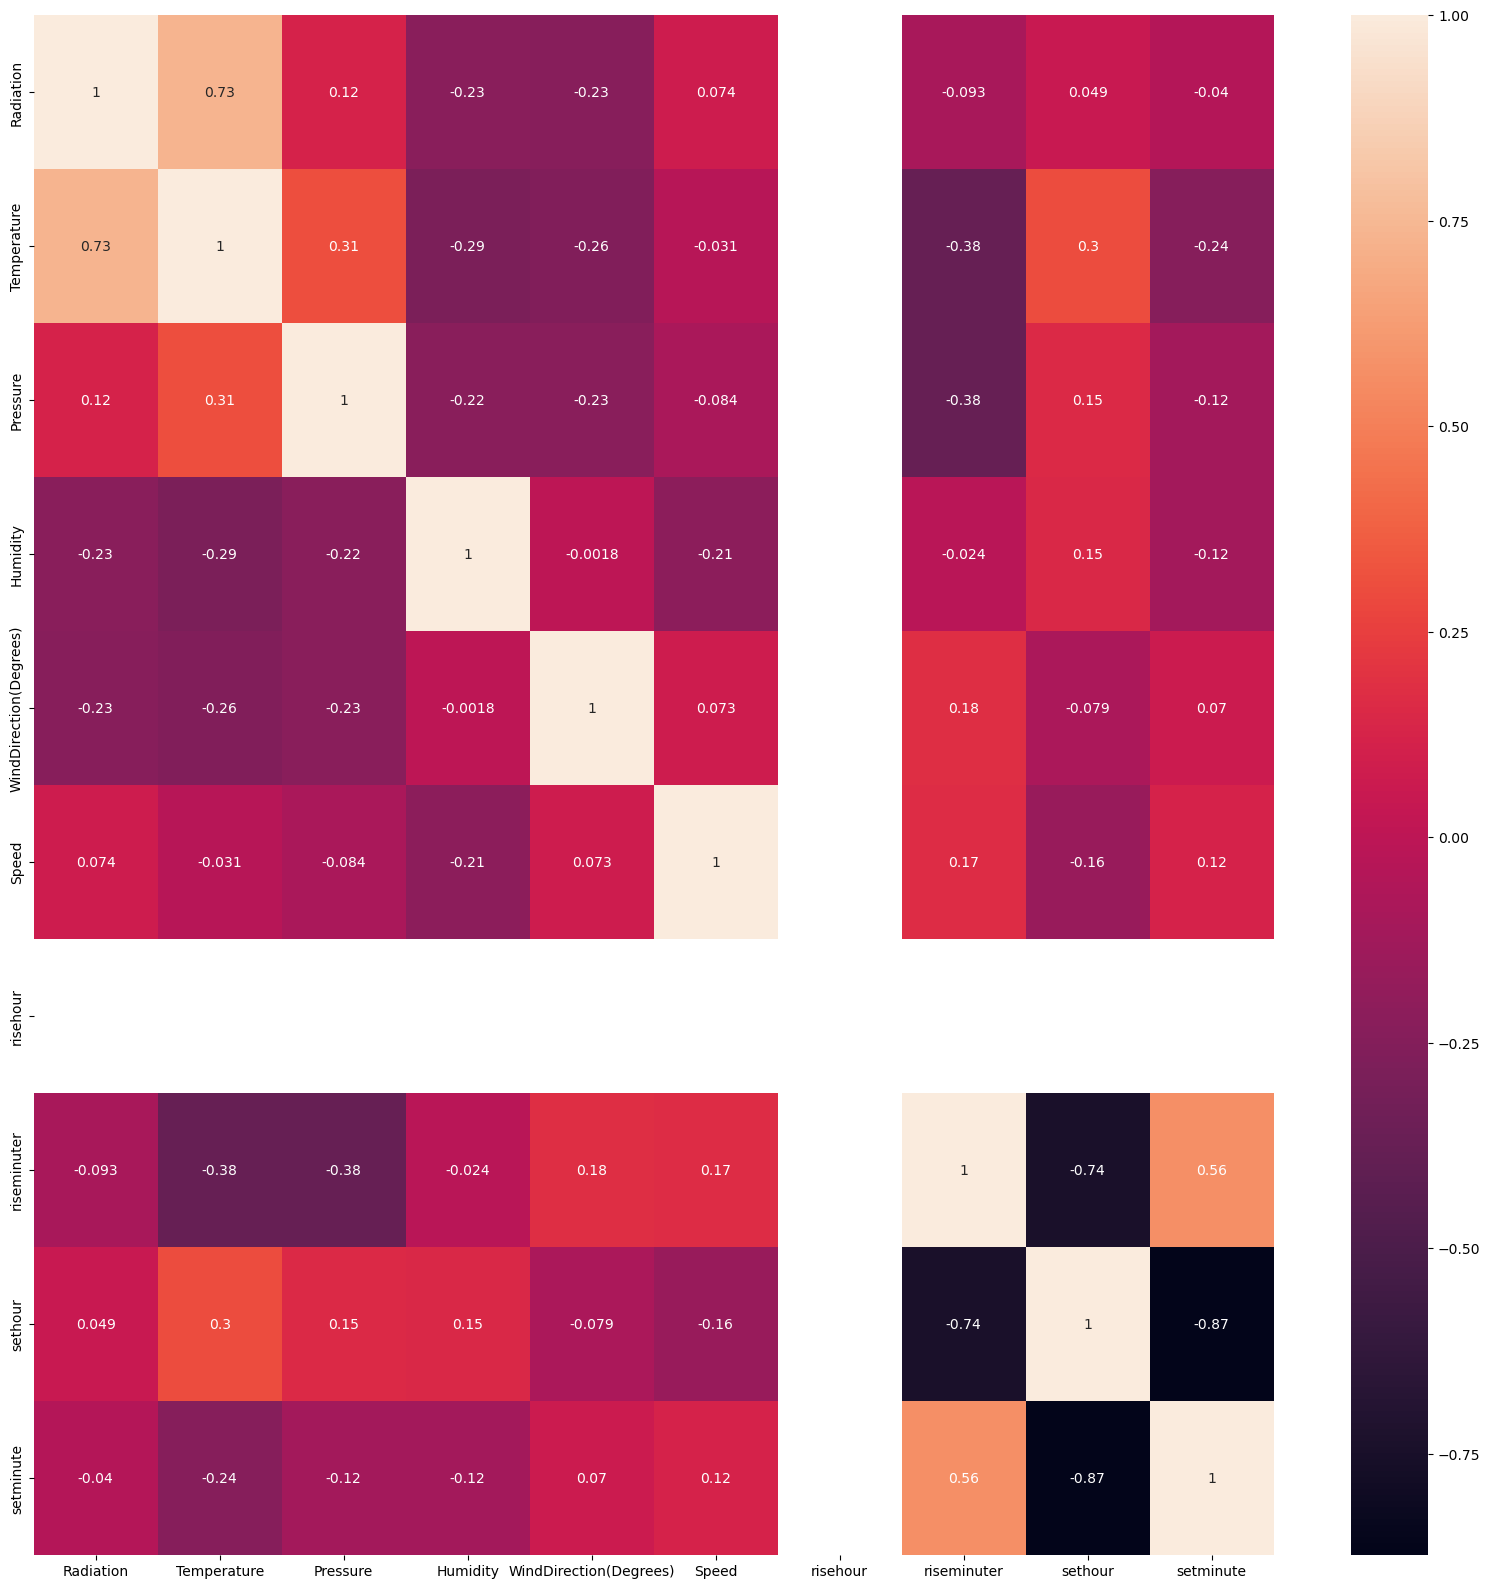

In [22]:
# plot the correlation matrix using heatmap for clear understanding
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

Feature Selection using SelectKBest Method

In [23]:
bestfeatures = SelectKBest(score_func = chi2, k = 10)

In [26]:
# use the label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [28]:
target_cont = df['Radiation'].apply(lambda x : int(x*100))
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestfeatures.fit(scaled_input_features, target_cont)

In [29]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [30]:
# contatinating data_features with the scores
featureScores = pd.concat([column, scores], axis=1)

#naming the dataframe columns
featureScores.columns = ['Features', 'feature_imp']

In [31]:
# best features
featureScores.sort_values(by = 'feature_imp', ascending=False, inplace=True)
featureScores

,Features,feature_imp
0,Temperature,38392.656154
3,WindDirection(Degrees),1830.982986
2,Humidity,1762.026235
1,Pressure,469.612672
6,riseminuter,284.222310
4,Speed,178.143456
7,sethour,77.760849
8,setminute,51.896659
5,risehour,0.000000


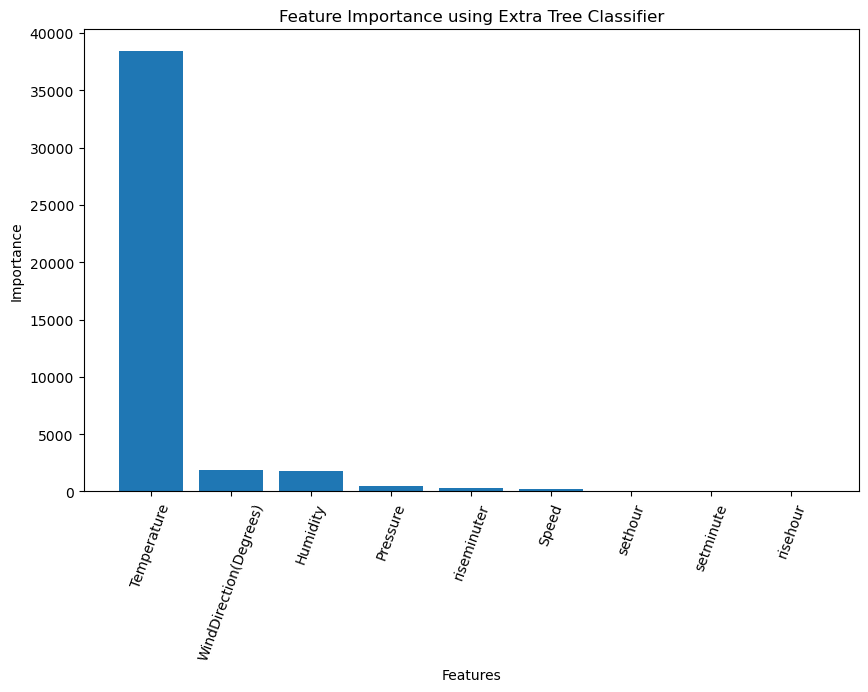

In [32]:
# visualise the feature importance
plt.figure(figsize = (10, 6))
plt.bar(featureScores.Features, featureScores.feature_imp)
plt.xticks(rotation = 70)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance using Extra Tree Classifier")
plt.show()

Feature Selection using Extra Tree Classifier

In [36]:
model = ExtraTreesClassifier(verbose = 1, n_estimators = 1)
model.fit(scaled_input_features, target_cont)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MemoryError: could not allocate 937361408 bytes

# Feature Engineering with BoxCox, Log, Min-Max and Standard transformation

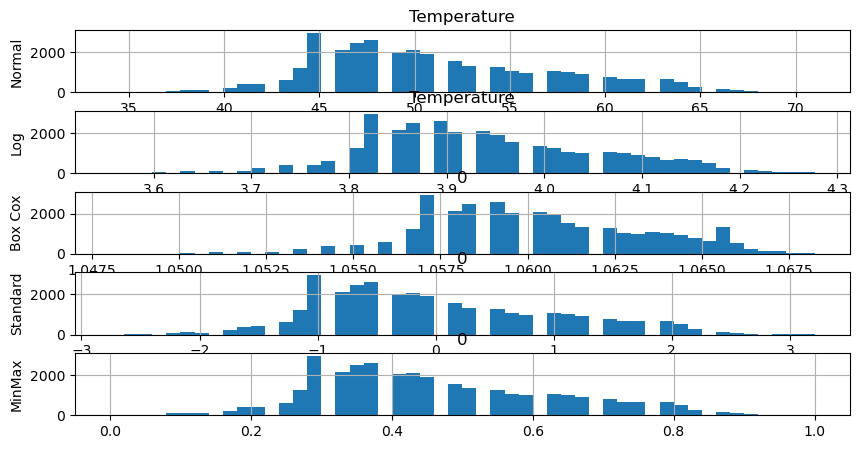

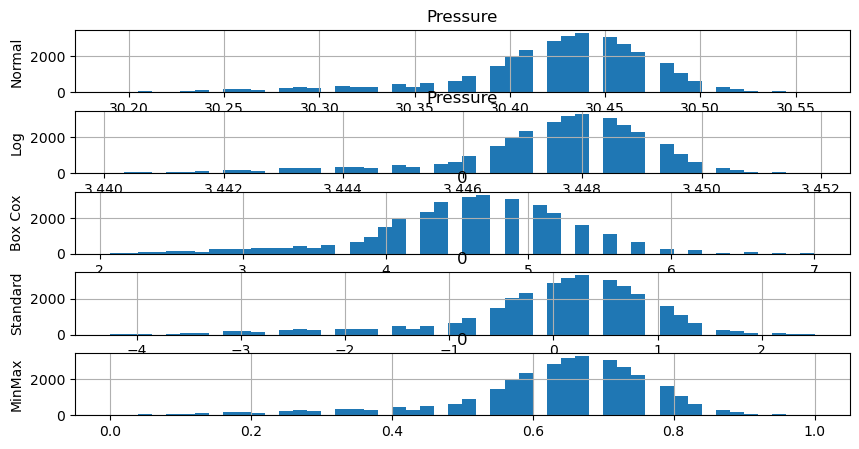

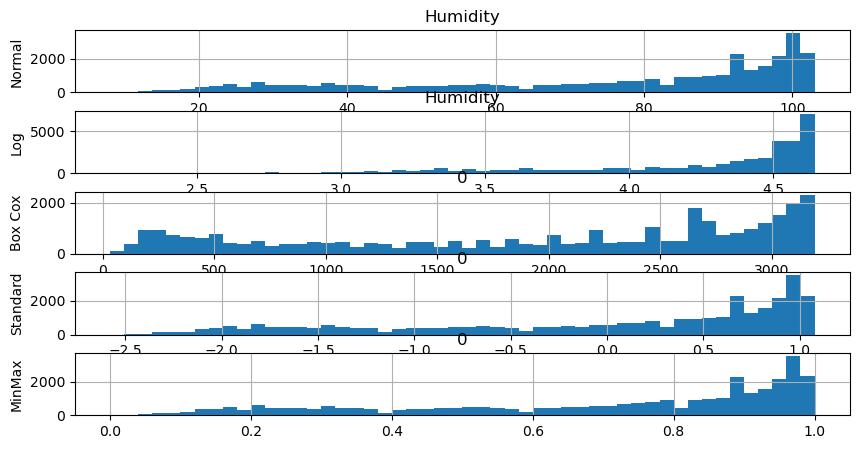

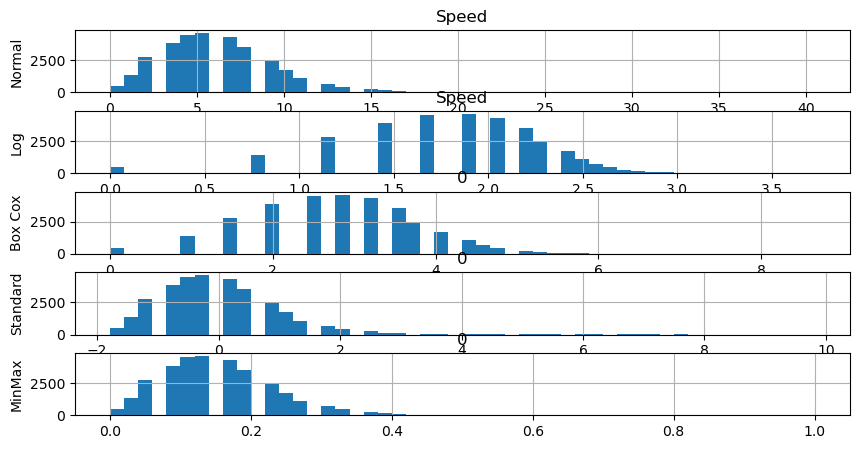

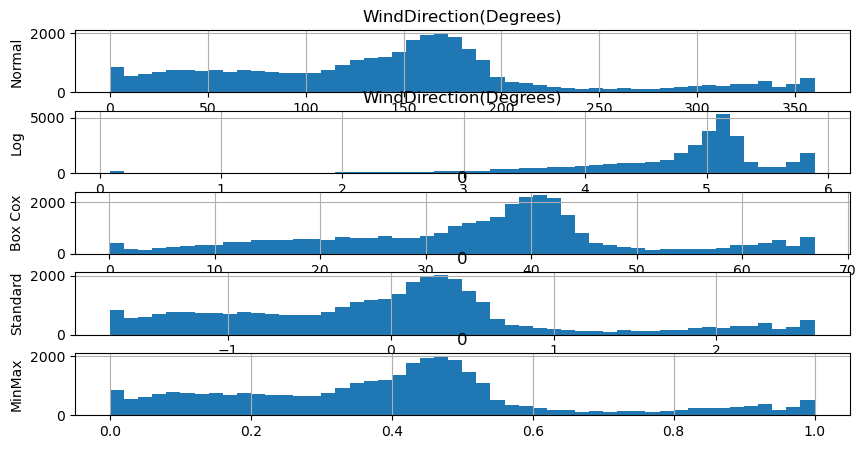

In [37]:
# Looking for transformation
features_to_transform = ['Temperature', 'Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)']

for i in features_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 5))
    
    pd.DataFrame(input_features[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins = 50)    
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1, 1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel('Normal')
    ax2.set_ylabel('Log')
    ax3.set_ylabel('Box Cox')
    ax4.set_ylabel('Standard')
    ax5.set_ylabel('MinMax')

In [38]:
# set the transformations required
transform = {'Temperature' : (input_features['Temperature']+1).transform(np.log), 
             'Pressure': stats.boxcox(input_features['Pressure']+1)[0], 
            'Humidity' : stats.boxcox(input_features['Humidity']+1)[0], 
            'Speed' : (input_features['Speed']+1).transform(np.log), 
            'WindDirection(Degrees)' : MinMaxScaler().fit_transform(
                np.array(input_features['WindDirection(Degrees)']).reshape(-1, 1))}

for i in transform:
    input_features[i] = transform[i]

In [39]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,risehour,riseminuter,sethour,setminute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,6,13,18,13


# Preparing data - Standardisation and Splitting

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [41]:
xtrain.shape, xtest.shape

((26148, 9), (6538, 9))

#Prediction with XGBoost

In [42]:
# declare parameters
params = {
    'learning_rate': 0.1,
    'max_depth': 8}

from xgboost import XGBRegressor
model = XGBRegressor(**params)

In [43]:
# train the model
model.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred = model.predict(xtest)

In [45]:
print('XGBoost model result: {0:0.4f}'. format(np.sqrt(mean_squared_error(ytest, y_pred))))

XGBoost model result: 109.1558


In [46]:
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2 = r2_score(ytest, y_pred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 109.16
R2: 0.88


# Using MultiLayer Perceptron for prediction

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(input_features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mean_squared_error'])

print(model.summary())


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Add the first layer with input dimension 9
model.add(Dense(128, activation='relu', input_dim=9))

model.add(Dropout(0.33))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mean_squared_error'])

print(model.summary())



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 159.8339 - mean_squared_error: 88930.3281 - val_loss: 98.1745 - val_mean_squared_error: 34285.0430
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 106.8493 - mean_squared_error: 39167.0898 - val_loss: 96.0327 - val_mean_squared_error: 32745.2090
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 103.4277 - mean_squared_error: 36836.1562 - val_loss: 94.3239 - val_mean_squared_error: 32202.1816
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 104.0039 - mean_squared_error: 38205.8398 - val_loss: 93.8126 - val_mean_squared_error: 31832.3730
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 103.6597 - mean_squared_error: 37783.4375 - val_loss: 95.3955 - val_mean_squared_error: 32263.6367
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 103.5406 - mean_squared_error: 37031.0859 - val_loss: 92.7752 - val_mean_squared_error: 30873.1543
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms

736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 97.1436 - mean_squared_error: 33282.5430 - val_loss: 88.2821 - val_mean_squared_error: 28237.5547
Epoch 44/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 92.7564 - mean_squared_error: 30677.5039 - val_loss: 87.3705 - val_mean_squared_error: 27897.7070
Epoch 45/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 94.9502 - mean_squared_error: 32239.4141 - val_loss: 86.6700 - val_mean_squared_error: 27657.6699
Epoch 46/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 95.9747 - mean_squared_error: 32615.3184 - val_loss: 87.6614 - val_mean_squared_error: 27713.1133
Epoch 47/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 95.1369 - mean_squared_error: 32206.2695 - val_loss: 87.7415 - val_mean_squared_error: 28314.2246
Epoch 48/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 94.6464 - mean_squared_error: 31961.5918 - val_loss: 89.3978 - val_mean_squared_error: 28977.9609
Epoch 49/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - los

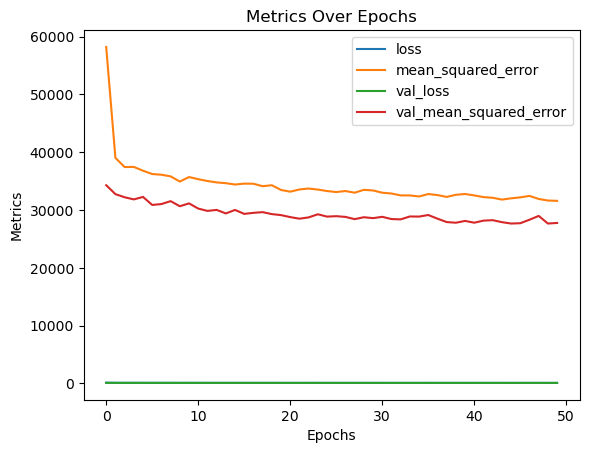

In [53]:
import matplotlib.pyplot as plt

# Train the model and store the training history
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=50, batch_size=32)

# Retrieve the metrics from the history object
fit = history.history

# Plot the metrics over epochs
for metric_name, metric_values in fit.items():
    plt.plot(metric_values, label=metric_name)

plt.title('Metrics Over Epochs')
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.legend()
plt.show()



In [54]:
scores = model.evaluate(xtest, ytest)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ', mae)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 84.6660 - mean_squared_error: 26643.0508
Mean absolute error:  83.80943298339844


In [55]:
mean_absolute_error(ytest, model.predict(xtest))


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


83.80942540220472